In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
!pwd

/content/drive/MyDrive/paperBuild/Compressor/data30


In [4]:
os.chdir('drive/MyDrive/paperBuild/Compressor/data30')
#os.chdir('../data40+')

In [6]:
!ls

data_0_1_.dat  data_3_1_.dat  data_6_0_.dat  xtrain.npy
data_1_0_.dat  data_4_0_.dat  data_7_1_.dat  ytest.npy
data_2_0_.dat  data_5_1_.dat  xtest.npy      ytrain.npy


In [8]:
xtrain=np.load('xtrain.npy')
xtest=np.load('xtest.npy')
ytest=np.load('ytest.npy')
ytrain=np.load('ytrain.npy')

In [9]:
xtest.shape

(16, 7, 20, 5)

In [10]:
np.max(xtrain[0][0])

1.0

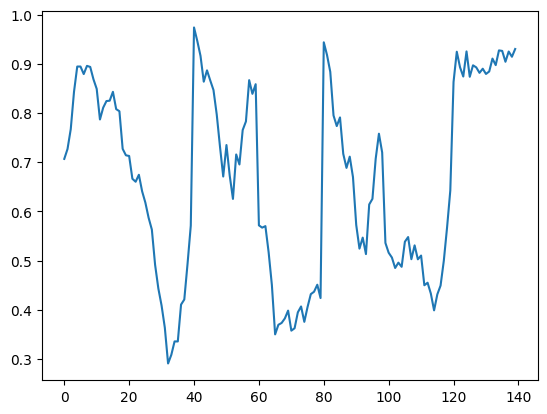

In [11]:
plt.plot(xtrain.transpose([0,3,1,2]).reshape(48,5,7*20)[0][0])

In [ ]:
# Model GRU

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, ConvLSTM2D, Flatten

In [13]:
# Data shapes and dimension
num_sequences=48
revolution=7
time_steps=20
channels=5

In [14]:
X=xtrain.reshape(num_sequences, revolution, -1) # Flattening train data
X_=xtest.reshape(16, revolution, -1) # 16 test sequences

In [15]:
# Model Architecture

modelGRU=Sequential([
    GRU(units=64, input_shape=(revolution, time_steps*channels), activation='relu'),
    Dense(units=1, activation='sigmoid')
])

modelGRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=modelGRU.fit(X, ytrain, epochs=20, batch_size=16, validation_data=(X_,ytest))

Epoch 1/20
3/3 [==============================] - 2s 169ms/step - loss: 0.7017 - accuracy: 0.5000 - val_loss: 0.6220 - val_accuracy: 0.5625
Epoch 2/20
3/3 [==============================] - 0s 18ms/step - loss: 0.6430 - accuracy: 0.5208 - val_loss: 0.5920 - val_accuracy: 0.7500
Epoch 3/20
3/3 [==============================] - 0s 22ms/step - loss: 0.6078 - accuracy: 0.8125 - val_loss: 0.5695 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 27ms/step - loss: 0.5801 - accuracy: 0.9583 - val_loss: 0.5390 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 26ms/step - loss: 0.5547 - accuracy: 0.9583 - val_loss: 0.5050 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 28ms/step - loss: 0.5268 - accuracy: 0.9792 - val_loss: 0.4689 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 26ms/step - loss: 0.5018 - accuracy: 0.9375 - val_loss: 0.4316 - val_accuracy: 1.0000
Epoch 8/20
3/3 [==========

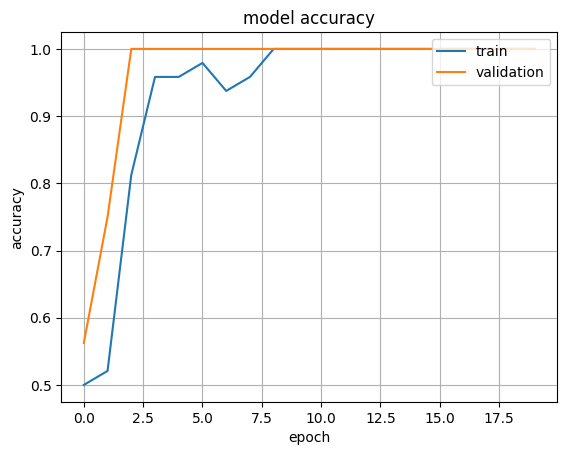

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

In [17]:
Xlstm=np.expand_dims(xtrain, axis=4)
X_lstm=np.expand_dims(xtest, axis=4)

In [18]:
# Define ConvLSTM model
modelCLSTM=Sequential([
    ConvLSTM2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(revolution,time_steps,channels,1)),
    Flatten(),
    Dense(units=1, activation='sigmoid')
])

modelCLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=modelCLSTM.fit(Xlstm, ytrain, epochs=20, batch_size=16, validation_data=(X_lstm,ytest))

Epoch 1/20
3/3 [==============================] - 4s 351ms/step - loss: 0.6902 - accuracy: 0.5000 - val_loss: 0.6689 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 1s 186ms/step - loss: 0.6729 - accuracy: 0.5000 - val_loss: 0.6454 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 1s 190ms/step - loss: 0.6532 - accuracy: 0.5000 - val_loss: 0.6171 - val_accuracy: 0.6875
Epoch 4/20
3/3 [==============================] - 1s 185ms/step - loss: 0.6363 - accuracy: 0.7292 - val_loss: 0.5839 - val_accuracy: 0.9375
Epoch 5/20
3/3 [==============================] - 1s 186ms/step - loss: 0.5902 - accuracy: 0.7292 - val_loss: 0.4964 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 1s 197ms/step - loss: 0.5064 - accuracy: 0.7708 - val_loss: 0.3322 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 1s 183ms/step - loss: 0.2450 - accuracy: 1.0000 - val_loss: 0.2335 - val_accuracy: 0.8750
Epoch 8/20
3/3 [====

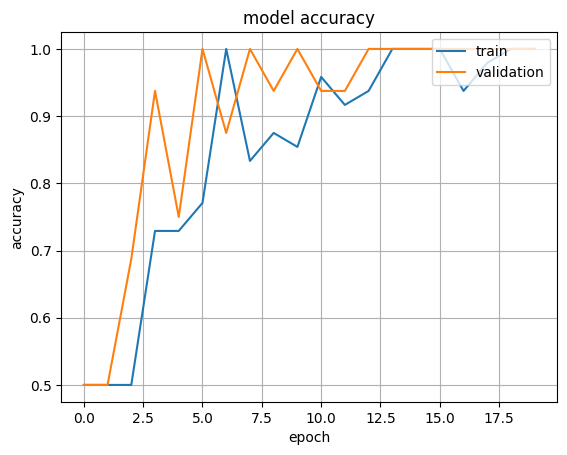

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

In [20]:
xtrain.shape

(48, 7, 20, 5)

In [21]:
np.corrcoef(xtrain[0][0]).shape

(20, 20)

In [22]:
temp=xtrain.transpose([0,1,3,2])
#temp=xtrain
adjacencyX=np.zeros((num_sequences,revolution,channels,channels))
featureX=np.zeros((num_sequences,revolution,channels))
#adjacencyX=np.zeros((num_sequences,revolution,time_steps,time_steps))
#featureX=np.zeros((num_sequences,revolution,time_steps))
for i in range(num_sequences):
  for j in range(revolution):
    adjacencyX[i][j]=abs(np.corrcoef(temp[i][j])) #abs()?
    featureX[i][j]=np.std(temp[i][j], axis=1)
    #adjacencyX[i][j]=np.corrcoef(temp[i][j]) #abs()?
    #featureX[i][j]=np.mean(temp[i][j], axis=1)
    adjacencyX[i][j]=abs(tf.cast(((adjacencyX[i][j])>0.5),tf.float32)) #threshold = 0.5


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [23]:
abs(tf.cast(((adjacencyX[0][0])>0.5),tf.float32))

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 1., 0., 1., 1.]], dtype=float32)>

In [24]:
temp=xtest.transpose([0,1,3,2])
#temp=xtest
adjacencyX_=np.zeros((16,revolution,channels,channels))
featureX_=np.zeros((16,revolution,channels))
#adjacencyX_=np.zeros((16,revolution,time_steps,time_steps))
#featureX_=np.zeros((16,revolution,time_steps))
for i in range(16):
  for j in range(revolution):
    adjacencyX_[i][j]=abs(np.corrcoef(temp[i][j]))
    featureX_[i][j]=np.std(temp[i][j], axis=1)
    #adjacencyX_[i][j]=np.corrcoef(temp[i][j])
    #featureX_[i][j]=np.mean(temp[i][j], axis=1)
    adjacencyX_[i][j]=abs(tf.cast(((adjacencyX_[i][j])>0.5),tf.float32)) #threshold = 0.5

In [25]:
featureX_[0][0]

array([0.05578799, 0.08435538, 0.20031347, 0.13888024, 0.2240732 ])

In [26]:
# Define GNN Model

class GNNmodel(tf.keras.Model):
  def __init__(self):
    super(GNNmodel, self).__init__()

  def call(self, inputs):
    x,a=inputs
    x=tf.squeeze(tf.matmul(tf.expand_dims(x,axis=0), tf.expand_dims(a,axis=0)))
    x=tf.squeeze(tf.matmul(tf.expand_dims(x,axis=0), tf.expand_dims(a,axis=0)))
    x=tf.squeeze(tf.matmul(tf.expand_dims(x,axis=0), tf.expand_dims(a,axis=0)))
    x=tf.squeeze(tf.matmul(tf.expand_dims(x,axis=0), tf.expand_dims(a,axis=0)))
    x=tf.squeeze(tf.matmul(tf.expand_dims(x,axis=0), tf.expand_dims(a,axis=0)))

    return x


In [27]:
tf.squeeze(tf.matmul(tf.expand_dims(featureX[0][0],axis=0), tf.expand_dims(adjacencyX[0][0],axis=0))).shape

TensorShape([5])

In [28]:
tf.matmul(tf.expand_dims(featureX[0][0],axis=0), tf.expand_dims(adjacencyX[0][0],axis=0)).shape

TensorShape([1, 1, 5])

In [29]:
# Create tensor

adjacencyX=tf.constant(adjacencyX)
adjacencyX_=tf.constant(adjacencyX_)
featureX_=tf.constant(featureX_)
featureX=tf.constant(featureX)


In [30]:
adjacencyX[0][0]

<tf.Tensor: shape=(5, 5), dtype=float64, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 1., 0., 1., 1.]])>

In [31]:
featureXn=np.zeros((num_sequences,revolution,channels))
featureX_n=np.zeros((16,revolution,channels))

#featureXn=np.zeros((num_sequences,revolution,time_steps))
#featureX_n=np.zeros((16,revolution,time_steps))

In [32]:
modelGNN=GNNmodel()

for i in range(num_sequences):
  for j in range(revolution):
    featureXn[i][j]=modelGNN((featureX[i][j], adjacencyX[i][j])).numpy()

for i in range(16):
  for j in range(revolution):
    featureX_n[i][j]=modelGNN((featureX_[i][j], adjacencyX_[i][j])).numpy()

In [33]:
adjacencyXn=adjacencyX.numpy()
adjacencyX_n=adjacencyX_.numpy()

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
featureXn=scaler.fit_transform(featureXn.reshape(num_sequences,-1)).reshape(num_sequences,revolution,channels)
featureX_n=scaler.transform(featureX_n.reshape(16,-1)).reshape(16,revolution,channels)

#featureXn=scaler.fit_transform(featureXn.reshape(num_sequences,-1)).reshape(num_sequences,revolution,time_steps)
#featureX_n=scaler.transform(featureX_n.reshape(16,-1)).reshape(16,revolution,time_steps)

In [35]:
featureX_n.shape

(16, 7, 5)

In [36]:
adjacencyXn.shape

(48, 7, 5, 5)

In [37]:
dataTrain=np.zeros((num_sequences,revolution,channels+1,channels))
#dataTrain=np.zeros((num_sequences,revolution,channels))
#dataTrain=np.zeros((num_sequences,revolution,time_steps+1,time_steps))
for i in range(num_sequences):
  for j in range(revolution):
    dataTrain[i][j][:channels]=adjacencyXn[i][j]
    dataTrain[i][j][channels]=featureXn[i][j]
    #dataTrain[i][j][:time_steps]=adjacencyXn[i][j]
    #dataTrain[i][j][time_steps]=featureXn[i][j]
    #dataTrain[i][j]=featureXn[i][j]


In [38]:
dataTest=np.zeros((16,revolution,channels+1,channels))
#dataTest=np.zeros((16,revolution,channels))
#dataTest=np.zeros((16,revolution,time_steps+1,time_steps))
for i in range(16):
  for j in range(revolution):
    dataTest[i][j][:channels]=adjacencyX_n[i][j]
    dataTest[i][j][channels]=featureX_n[i][j]
    #dataTest[i][j][:time_steps]=adjacencyX_n[i][j]
    #dataTest[i][j][time_steps]=featureX_n[i][j]
    #dataTest[i][j]=featureX_n[i][j]

In [39]:
X=dataTrain.reshape(num_sequences, revolution, -1) # Flattening train data
X_=dataTest.reshape(16, revolution, -1) # 16 test sequences

In [40]:
X_[0][5]

array([1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.14601593e+00, 1.11376546e-04, 7.22666303e-01,
       7.22657000e-01, 7.22641698e-01])

In [41]:
# Model Architecture

modelGRU=Sequential([
    GRU(units=64, input_shape=(revolution, (channels+1)*channels), activation='relu'),
    #GRU(units=64, input_shape=(revolution, channels), activation='relu'),
    #GRU(units=64, input_shape=(revolution, (time_steps+1)*time_steps), activation='relu'),
    Dense(units=1, activation='sigmoid')
])

modelGRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=modelGRU.fit(X, ytrain, epochs=20, batch_size=16, validation_data=(X_,ytest))

Epoch 1/20
3/3 [==============================] - 1s 145ms/step - loss: 0.6989 - accuracy: 0.5000 - val_loss: 0.6733 - val_accuracy: 0.7500
Epoch 2/20
3/3 [==============================] - 0s 19ms/step - loss: 0.6735 - accuracy: 0.6250 - val_loss: 0.6582 - val_accuracy: 0.8125
Epoch 3/20
3/3 [==============================] - 0s 18ms/step - loss: 0.6480 - accuracy: 0.7708 - val_loss: 0.6432 - val_accuracy: 0.8750
Epoch 4/20
3/3 [==============================] - 0s 20ms/step - loss: 0.6248 - accuracy: 0.9375 - val_loss: 0.6284 - val_accuracy: 0.8750
Epoch 5/20
3/3 [==============================] - 0s 21ms/step - loss: 0.6024 - accuracy: 0.9375 - val_loss: 0.6129 - val_accuracy: 0.8750
Epoch 6/20
3/3 [==============================] - 0s 17ms/step - loss: 0.5777 - accuracy: 0.9375 - val_loss: 0.5961 - val_accuracy: 0.8750
Epoch 7/20
3/3 [==============================] - 0s 17ms/step - loss: 0.5511 - accuracy: 0.9375 - val_loss: 0.5775 - val_accuracy: 0.8125
Epoch 8/20
3/3 [==========

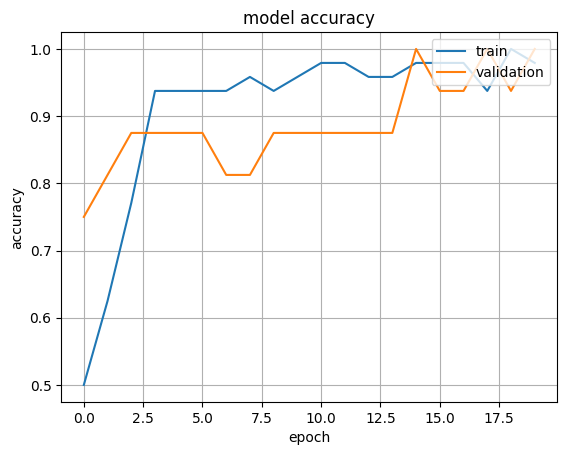

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
history.history['val_accuracy']


[0.5625,
 0.625,
 0.6875,
 0.8125,
 0.8125,
 0.8125,
 0.8125,
 0.8125,
 0.8125,
 0.8125,
 0.9375,
 0.9375,
 0.9375,
 0.875,
 0.875,
 0.9375,
 0.9375,
 0.8125,
 0.9375,
 0.9375]

In [ ]:
X.shape

(48, 7, 30)

In [43]:
Xlstm=np.expand_dims(dataTrain, axis=4)
X_lstm=np.expand_dims(dataTest, axis=4)

In [44]:
# Define ConvLSTM model
modelCLSTM=Sequential([
    ConvLSTM2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(revolution,channels+1,channels,1)),
    Flatten(),
    Dense(units=1, activation='sigmoid')
])

modelCLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=modelCLSTM.fit(Xlstm, ytrain, epochs=20, batch_size=16, validation_data=(X_lstm,ytest))

Epoch 1/20
3/3 [==============================] - 3s 353ms/step - loss: 0.6866 - accuracy: 0.5000 - val_loss: 0.6746 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 0s 115ms/step - loss: 0.6676 - accuracy: 0.5208 - val_loss: 0.6554 - val_accuracy: 0.5625
Epoch 3/20
3/3 [==============================] - 0s 137ms/step - loss: 0.6422 - accuracy: 0.7292 - val_loss: 0.6292 - val_accuracy: 0.8125
Epoch 4/20
3/3 [==============================] - 0s 132ms/step - loss: 0.6097 - accuracy: 0.9167 - val_loss: 0.5871 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 119ms/step - loss: 0.5502 - accuracy: 0.9792 - val_loss: 0.4918 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 116ms/step - loss: 0.4277 - accuracy: 0.9375 - val_loss: 0.2994 - val_accuracy: 0.8750
Epoch 7/20
3/3 [==============================] - 0s 135ms/step - loss: 0.2405 - accuracy: 0.9583 - val_loss: 0.4179 - val_accuracy: 0.8125
Epoch 8/20
3/3 [====

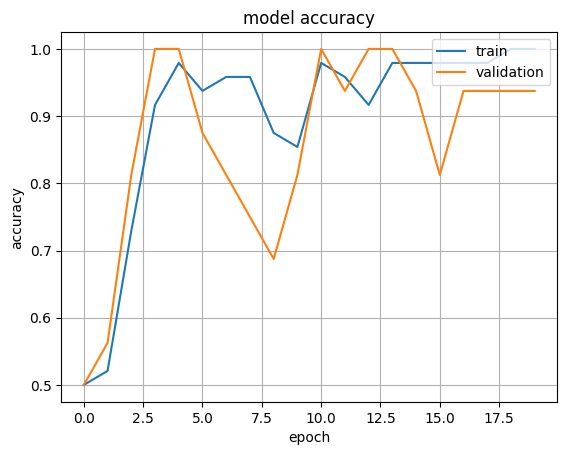

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

In [47]:
dataTrain[0][0]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [2.95253646e-04, 1.33301282e-01, 8.67744256e-04, 9.66686089e-02,
        1.96234627e-01]])

In [48]:
import networkx as nx
import time
import matplotlib.animation

In [ ]:
adjacencyXn[0][0]

array([[1., 1., 1., 1., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1.]])

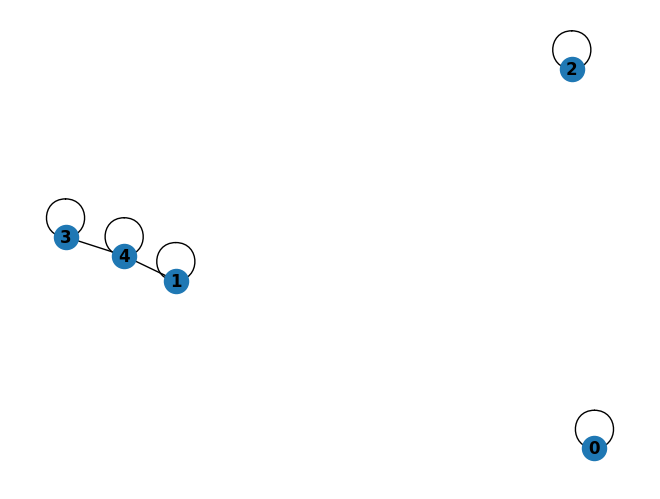

In [49]:
# 2D array to represent the adjacency matrix
datapoint=0
revo=0

adjacency_matrix = adjacencyXn[datapoint][revo]

# Generate corresponding edge list
edges = [(i, j) for i in range(adjacency_matrix.shape[0]) for j in range(adjacency_matrix.shape[1]) if adjacency_matrix[i, j] == 1]
#edges=[(i,j) for i in range(5) for j in range(5)]
# Create a graph from the edge list
G = nx.Graph(edges)

# Visualize the generated graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

<ipython-input-50-828637720602>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(1,revolution,i+1)


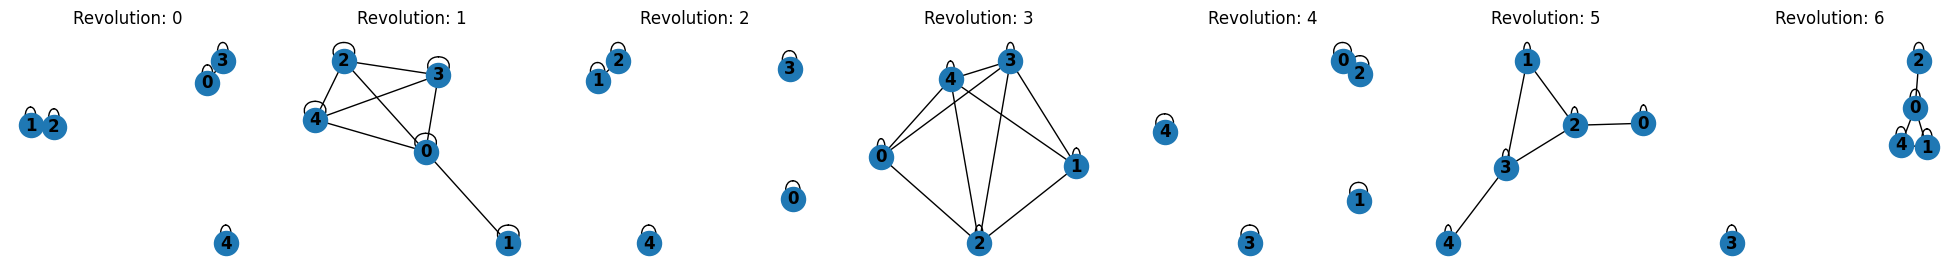

In [50]:
def graphGen(datapoint,revo,adjacencyXn):
  # 2D array to represent the adjacency matrix
  adjacency_matrix = adjacencyXn[datapoint][revo]
  # Generate corresponding edge list
  edges = [(i, j) for i in range(adjacency_matrix.shape[0]) for j in range(adjacency_matrix.shape[1]) if adjacency_matrix[i, j] == 1]
  #edges=[(i,j) for i in range(5) for j in range(5)]
  # Create a graph from the edge list
  G = nx.Graph(edges)
  return G

fig,ax = plt.subplots(figsize=(25,3))
dataP=1
for i in range(revolution):
  #ax.clear()
  G=graphGen(dataP,i,adjacencyXn)
  # Visualize the generated graph
  ax=plt.subplot(1,revolution,i+1)
  nx.draw(G, with_labels=True, font_weight='bold', ax=ax)
  plt.title('Revolution: '+str(i))
  #plt.axis()
  #time.sleep(0.1)

#ani = matplotlib.animation.FuncAnimation(fig, update, frames=6, interval=1000, repeat=True)
#plt.show()